## Clustering items

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
purchases = pd.read_csv('datasets/train_purchases.csv')
sessions = pd.read_csv('datasets/train_sessions.csv')
features = pd.read_csv('datasets/item_features.csv')

In [3]:
features_ones = features.copy()
features_ones["feature_value_id"]=1
features_ones = features_ones.dropna()
features_ones = features_ones.pivot_table(values='feature_value_id', index='item_id', columns='feature_category_id', aggfunc='first')
features_ones = features_ones.replace(np.nan, 0)
features_matrix = features.pivot_table(values='feature_value_id', index='item_id', columns='feature_category_id', aggfunc='first')

features_ones.head(10)

feature_category_id,1,2,3,4,5,6,7,8,9,10,...,64,65,66,67,68,69,70,71,72,73
item_id,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
4,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
8,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
9,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
10,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
13,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0


In [4]:
features_scaled = features_ones

In [5]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

from sklearn.decomposition import PCA

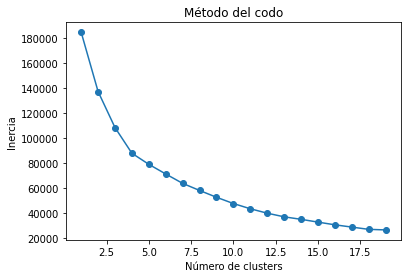

In [6]:
# Elbow method to find the optimal number of clusters 
import matplotlib.pyplot as plt

wcss = []

for i in range(1,20):
    kmeans = KMeans(n_clusters=i,max_iter=300,n_init=10,random_state=0)
    km=kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)
plt.figure()
plt.plot(range(1,20),wcss, marker="o")

plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')

plt.show()

Se puede ver un 'codo' con 4 clusters, ese será el número de clusters que usaremos de ahora en adelante.

In [7]:
features_series=pd.Series(features_scaled.index)

In [8]:
n_clusts = 4

In [9]:
def visualize_clusters(to_plot,n_clusters,method,centers = []):
    
    plt.figure(figsize=(15,8))
    ax=plt.subplot()

    colors=['red','green','blue','orange','yellow','purple','brown','black','magenta','cyan']

    for n_clusters in range(n_clusters):
        
        #colors = cm.nipy_spectral((to_plot['Cluster_pred']== n_clusters).astype(float) / n_clusters)
        #colors=['red','green','blue','orange','yellow','purple']
        
        ax.scatter(to_plot[to_plot['Cluster_pred']==n_clusters].iloc[:, 1],to_plot[to_plot['Cluster_pred']==n_clusters].iloc[:, 2],
                   marker='.', s=80, lw=0, alpha=0.7,
                    c=colors[n_clusters], edgecolor='black', label='Cluster %d'%n_clusters)

            
            # Draw white circles at cluster centers
    for i, c in enumerate(centers):

        ax.scatter(c[0], c[1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')
        ax.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=80, edgecolor='k')
                                
    ax.set_title("The visualization of the clustered data using the " + method + " method.")
    ax.set_xlabel("Dimension 1")
    ax.set_ylabel("Dimension 2")

    plt.legend()    
    plt.show()


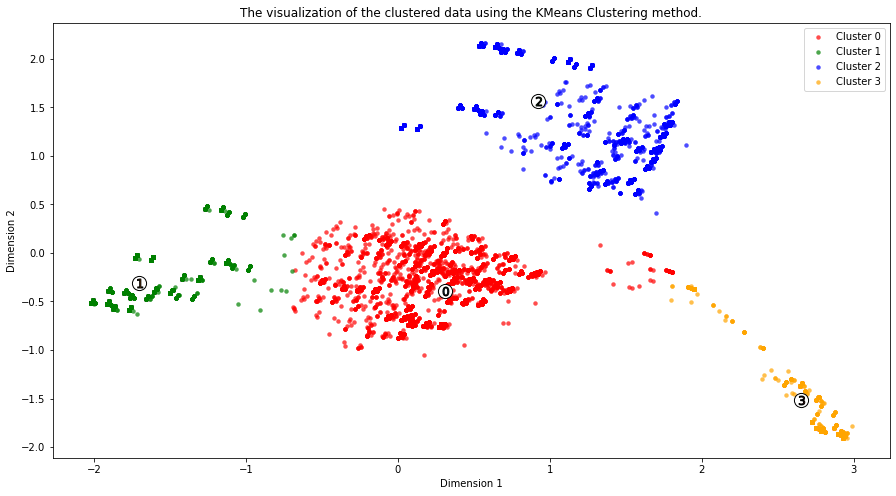

In [10]:
#KMEANS

#visualizing the 4 clusters in 2 dimensions with 2 principal componenets
#reducing data to 2 prinicipal components
pca_2comp=PCA(n_components=2)
df_reduced_2comp=pca_2comp.fit_transform(features_scaled)

# running Kmeans for 5 clusters on 2 PC's
kmeans_pca_2comp=KMeans(n_clusters=n_clusts)
reduced_cluster_labels_2comp=kmeans_pca_2comp.fit_predict(df_reduced_2comp)
centers_2comp=kmeans_pca_2comp.cluster_centers_

#creating dataframes for cluster labels and 2 PC's
predictions=pd.DataFrame(reduced_cluster_labels_2comp,columns=['Cluster_pred'])
reduced_df_2comp=pd.DataFrame(np.round(df_reduced_2comp,n_clusts),columns=['Dimension 1','Dimension 2'])

# concatanete the above two dfs
to_plot=pd.concat([predictions,reduced_df_2comp], axis=1)

visualize_clusters(to_plot,n_clusts,"KMeans Clustering",centers_2comp)

#AgglomerativeClustering

#visualizing the 5 clusters in 2 dimensions with 2 principal componenets
#reducing data to 2 prinicipal components
pca_2comp=PCA(n_components=2)
df_reduced_2comp=pca_2comp.fit_transform(features_scaled)

# running Kmeans for 5 clusters on 2 PC's
kmeans_pca_2comp=AgglomerativeClustering(n_clusters=4)
reduced_cluster_labels_2comp=kmeans_pca_2comp.fit_predict(df_reduced_2comp)
#centers_2comp=kmeans_pca_2comp.cluster_centers_

#creating dataframes for cluster labels and 2 PC's
predictions=pd.DataFrame(reduced_cluster_labels_2comp,columns=['Cluster_pred'])
reduced_df_2comp=pd.DataFrame(np.round(df_reduced_2comp,4),columns=['Dimension 1','Dimension 2'])

# concatanete the above two dfs
to_plot=pd.concat([predictions,reduced_df_2comp], axis=1)

visualize_clusters(to_plot,4,"Agglomerative Clustering")

#GMixture

#visualizing the 5 clusters in 2 dimensions with 2 principal componenets
#reducing data to 2 prinicipal components
pca_2comp=PCA(n_components=2)
df_reduced_2comp=pca_2comp.fit_transform(features_scaled)

# running Kmeans for 5 clusters on 2 PC's
kmeans_pca_2comp=GaussianMixture(n_components=5)
reduced_cluster_labels_2comp=kmeans_pca_2comp.fit_predict(df_reduced_2comp)
#centers_2comp=kmeans_pca_2comp.cluster_centers_

#creating dataframes for cluster labels and 2 PC's
predictions=pd.DataFrame(reduced_cluster_labels_2comp,columns=['Cluster_pred'])
reduced_df_2comp=pd.DataFrame(np.round(df_reduced_2comp,4),columns=['Dimension 1','Dimension 2'])

# concatanete the above two dfs
to_plot=pd.concat([predictions,reduced_df_2comp], axis=1)

visualize_clusters(to_plot,4,"Gaussian Mixture")

In [11]:
print(predictions)

       Cluster_pred
0                 2
1                 1
2                 1
3                 0
4                 1
...             ...
23686             1
23687             3
23688             1
23689             0
23690             0

[23691 rows x 1 columns]


In [12]:
cluster_assign = predictions.loc[to_plot.index,'Cluster_pred']
cluster_assign= cluster_assign.to_frame()

cluster_assign["item_id2"]=np.unique(features[['item_id']].values).tolist()
#print(np.unique(features[['item_id']].values).tolist())
cluster_assign.head()
cluster_assign.to_csv('datasets/cluster_assign.csv')